In [5]:
# from spatialize.gs.esi import hparams_search, egriddata

import hvplot.xarray  # noqa: adds hvplot methods to xarray objects
import hvplot
hvplot.extension()

In [6]:
import numpy as np
def func(x, y):  # a kind of cubic function
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y ** 2) ** 2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [7]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [8]:
import xarray as xr

ds = xr.DataArray(func(grid_x, grid_y).T)
ds0 = xr.DataArray(grid_z0.T)
ds1 = xr.DataArray(grid_z1.T)
ds2 = xr.DataArray(grid_z2.T)


:Layout
   .Image.I   :Image   [dim_1,dim_0]   (value)
   .Image.II  :Image   [dim_1,dim_0]   (value)
   .Image.III :Image   [dim_1,dim_0]   (value)
   .Image.IV  :Image   [dim_1,dim_0]   (value)
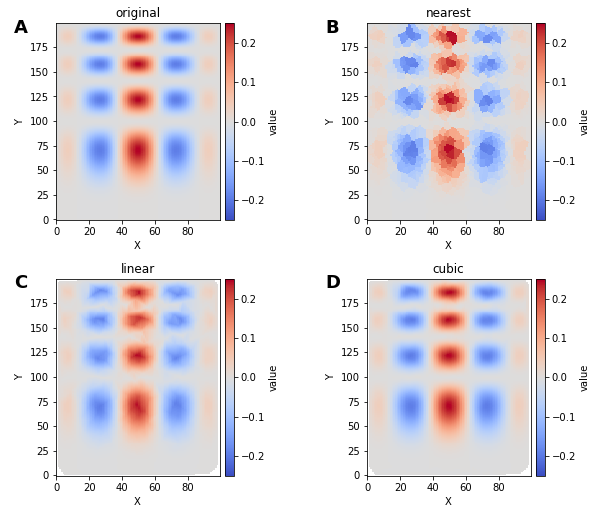

In [9]:
w, h = 500, 600
fig = ds.hvplot.image(title="original", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds0.hvplot.image(title="nearest", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds1.hvplot.image(title="linear", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds2.hvplot.image(title="cubic", width=w, height=h, xlabel='X', ylabel='Y')
fig.cols(2)

:Layout
   .Image.I  :Image   [dim_1,dim_0]   (value)
   .Image.II :Image   [dim_1,dim_0]   (value)
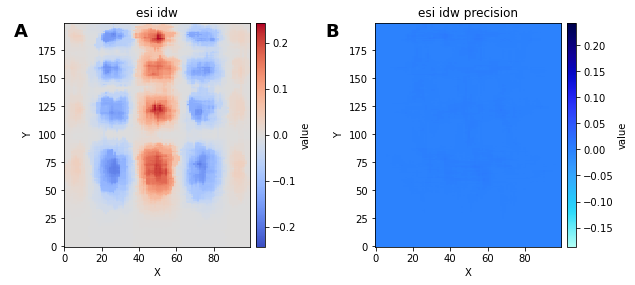

In [10]:
import spatialize.gs.esi.aggfunction as af
import spatialize.gs.esi.precfunction as pf
from spatialize.gs.esi import esi_griddata

grid_z3, grid_z3p = esi_griddata(points, values, (grid_x, grid_y),
                             base_interpolator="idw",
                             exponent=14.0,
                             n_partitions=100, alpha=0.985,
                             agg_function=af.median, prec_function=pf.mse_precision)
ds3 = xr.DataArray(grid_z3.T)
ds3p = xr.DataArray(grid_z3p.T)

fig = ds3.hvplot.image(title="esi idw", width=w, height=h, xlabel='X', ylabel='Y')
fig += ds3p.hvplot.image(title="esi idw precision", width=w, height=h, xlabel='X', ylabel='Y')
fig

:Layout
   .Image.I  :Image   [dim_1,dim_0]   (value)
   .Image.II :Image   [dim_1,dim_0]   (value)
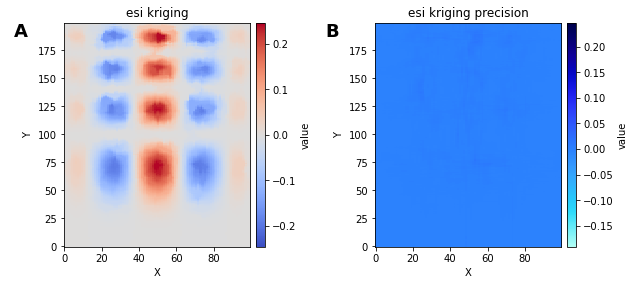

In [12]:
grid_z4, grid_z4p = esi_griddata(points, values, (grid_x, grid_y),
                             base_interpolator="kriging",
                             model="cubic", nugget=0.0, range=10.0,
                             n_partitions=1000, alpha=0.985,
                             agg_function=af.median, prec_function=pf.mse_precision)
ds4 = xr.DataArray(grid_z4.T)
ds4p = xr.DataArray(grid_z4p.T)

fig = ds4.hvplot.image(title="esi kriging", width=w, height=h, xlabel='X', ylabel='Y')
fig += ds4p.hvplot.image(title="esi kriging precision", width=w, height=h, xlabel='X', ylabel='Y')
fig